###**Name: Ali Haris**  
###**Naptun: EYMPJ9**

## Import module

In [1]:
!pip install ultralytics

from ultralytics import YOLO

import matplotlib.pyplot as plt
import random

import cv2
import os
import random

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 645.7/645.7 kB 12.2 MB/s eta 0:00:00


## Data Visualization

In [ ]:
# Config the global variables
root = '/content/drive/MyDrive/ELTE/DND/A2/final_test/'
LABEL_FOLDER = root + 'swans/train/labels/'  # Put the label files in this folder.
RAW_IMAGE_FOLDER = root + 'swans/train/images/'  # Put the original images without boxes in this folder.
OUTPUT_IMAGE_FOLDER = root + 'vis_im/'  # The output images would be saved to this folder.
IMAGE_NAME_LIST_PATH = root + 'name_list.txt'  # The file name of images will be saved into this text file.
CLASS_PATH = root + 'classes.txt' # Put the class names in this text file.


def plot_one_box(x, image, color=None, label=None, line_thickness=None):
    # Plots one bounding box on image img
    tl = line_thickness or round(
        0.002 * (image.shape[0] + image.shape[1]) / 2) + 1  # line/font thickness
    color = color or [random.randint(0, 255) for _ in range(3)]
    c1, c2 = (int(x[0]), int(x[1])), (int(x[2]), int(x[3]))
    cv2.rectangle(image, c1, c2, color, thickness=tl, lineType=cv2.LINE_AA)
    if label:
        tf = max(tl - 1, 1)  # font thickness
        t_size = cv2.getTextSize(label, 0, fontScale=tl / 3, thickness=tf)[0]
        c2 = c1[0] + t_size[0], c1[1] - t_size[1] - 3
        cv2.rectangle(image, c1, c2, color, -1, cv2.LINE_AA)  # filled
        cv2.putText(image, label, (c1[0], c1[1] - 2), 0, tl / 3,
                    [225, 255, 255], thickness=tf, lineType=cv2.LINE_AA)

def draw_box_on_image(image_name, classes, colors, LABEL_FOLDER, RAW_IMAGE_FOLDER, OUTPUT_IMAGE_FOLDER):
    """
    This function will add rectangle boxes on the images.
    """
    txt_path = os.path.join(LABEL_FOLDER, '%s.txt' %
                            (image_name))
    #print(image_name)
    if image_name == '.DS_Store':
        return 0
    image_path = os.path.join(RAW_IMAGE_FOLDER, '%s.jpg' %
                              (image_name))

    save_file_path = os.path.join(
        OUTPUT_IMAGE_FOLDER, '%s.jpg' % (image_name))

    # flag_people_or_car_data = 0
    source_file = open(txt_path) if os.path.exists(txt_path) else []
    image = cv2.imread(image_path)
    try:
        height, width, channels = image.shape
    except:
        print('no shape info.')
        return 0

    box_number = 0
    for line in source_file:
        staff = line.split()
        class_idx = int(staff[0])

        x_center, y_center, w, h = float(
            staff[1])*width, float(staff[2])*height, float(staff[3])*width, float(staff[4])*height
        x1 = round(x_center-w/2)
        y1 = round(y_center-h/2)
        x2 = round(x_center+w/2)
        y2 = round(y_center+h/2)

        plot_one_box([x1, y1, x2, y2], image, color=colors[class_idx],
                     label=classes[class_idx], line_thickness=None)

        cv2.imwrite(save_file_path, image)

        box_number += 1
    return box_number


def make_name_list(RAW_IMAGE_FOLDER, IMAGE_NAME_LIST_PATH):
    """
    This function will collect the image names without extension and save them in the name_list.txt.
    """
    image_file_list = os.listdir(RAW_IMAGE_FOLDER)

    text_image_name_list_file = open(
        IMAGE_NAME_LIST_PATH, 'w')

    for image_file_name in image_file_list:
        image_name, file_extend = os.path.splitext(image_file_name)
        text_image_name_list_file.write(image_name+'\n')

    text_image_name_list_file.close()


if __name__ == '__main__':

    make_name_list(RAW_IMAGE_FOLDER, IMAGE_NAME_LIST_PATH)

    classes = image_names = open(CLASS_PATH).read().strip().split('\n')
    random.seed(42)
    colors = [[random.randint(0, 255) for _ in range(3)]
              for _ in range(len(classes))]

    image_names = open(IMAGE_NAME_LIST_PATH).read(
    ).strip().split()

    box_total = 0
    image_total = 0
    for image_name in image_names:
        box_num = draw_box_on_image(
            image_name, classes, colors, LABEL_FOLDER, RAW_IMAGE_FOLDER, OUTPUT_IMAGE_FOLDER)
        box_total += box_num
        image_total += 1
        #print('Box number:', box_total, 'Image number:', image_total)


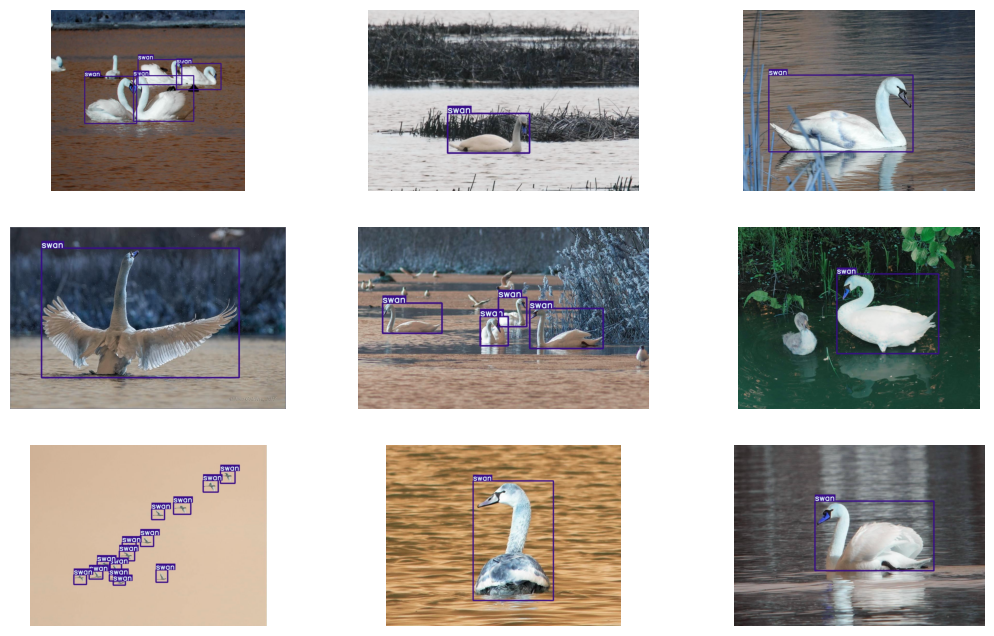

In [ ]:
plt.figure(figsize=(13,8))
img_dir="/content/drive/MyDrive/ELTE/DND/A2/final_test/vis_im"
all_files=os.listdir(img_dir)
data_path = [os.path.join(img_dir + "/" + i) for i in all_files]
sample = random.sample(data_path, 9)

for count,i in enumerate(sample):
    plt.subplot(int(len(sample)/3),int(len(sample)/3),count+1)
    plt.imshow(cv2.imread(i))
    plt.axis('off')
plt.show()

## Train

In [2]:
data_yaml_path = '/content/drive/MyDrive/ELTE/DND/A2/final_test/swans/data.yaml'
save_path = '/content/drive/MyDrive/ELTE/DND/A2/final_test/'

In [3]:
yolo = YOLO('yolov8n.pt')
yolo.info()

100%|██████████| 6.23M/6.23M [00:00<00:00, 221MB/s]


YOLOv8n summary: 225 layers, 3157200 parameters, 0 gradients, 8.9 GFLOPs


(225, 3157200, 0, 8.8575488)

In [5]:
result = yolo.train(data = data_yaml_path, epochs = 40, batch = 10, patience = 30, weight_decay = 0.0005, project = save_path + 'final_runs', name = 'train')

Ultralytics YOLOv8.0.215 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/drive/MyDrive/ELTE/DND/A2/final_test/swans/data.yaml, epochs=40, patience=30, batch=10, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=/content/drive/MyDrive/ELTE/DND/A2/final_test/final_runs, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffer=False, line_width=None, visualize=False, augment=False, agnostic_nms=Fal

100%|██████████| 755k/755k [00:00<00:00, 100MB/s]


Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

train: Scanning /content/drive/MyDrive/ELTE/DND/A2/final_test/swans/train/labels.cache... 80 images, 0 backgrounds, 0 corrupt: 100%|██████████| 80/80 [00:00<?, ?it/s]


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


val: Scanning /content/drive/MyDrive/ELTE/DND/A2/final_test/swans/valid/labels.cache... 20 images, 0 backgrounds, 0 corrupt: 100%|██████████| 20/20 [00:00<?, ?it/s]


Plotting labels to /content/drive/MyDrive/ELTE/DND/A2/final_test/final_runs/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.00046875), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to /content/drive/MyDrive/ELTE/DND/A2/final_test/final_runs/train
Starting training for 40 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/40      1.68G      1.308      3.032      1.405         29        640: 100%|██████████| 8/8 [00:18<00:00,  2.32s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.59s/it]

                   all         20         38     0.0055      0.868      0.509      0.398



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/40      1.68G      1.051      2.083      1.212         26        640: 100%|██████████| 8/8 [00:02<00:00,  3.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.24it/s]

                   all         20         38          1      0.251      0.589       0.46



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/40      1.67G      1.042      1.667      1.182         29        640: 100%|██████████| 8/8 [00:01<00:00,  5.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.30it/s]


                   all         20         38      0.829      0.395      0.552      0.381

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/40      1.67G      1.021      1.615      1.186         61        640: 100%|██████████| 8/8 [00:01<00:00,  5.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.13it/s]

                   all         20         38      0.875      0.184      0.536      0.385



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/40      1.68G      1.063      1.665      1.174         38        640: 100%|██████████| 8/8 [00:01<00:00,  5.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.17it/s]

                   all         20         38      0.863      0.499      0.636      0.406



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/40      1.67G      1.014      1.499      1.136         27        640: 100%|██████████| 8/8 [00:01<00:00,  5.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.21it/s]


                   all         20         38      0.555      0.553      0.466      0.249

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/40      1.69G      1.041      1.522      1.197         38        640: 100%|██████████| 8/8 [00:01<00:00,  4.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.17it/s]

                   all         20         38      0.662      0.553      0.563      0.335



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/40      1.67G      1.149      1.548       1.17         67        640: 100%|██████████| 8/8 [00:02<00:00,  3.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.82it/s]

                   all         20         38       0.61      0.421      0.519      0.309



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/40      1.67G      1.143      1.643      1.192         27        640: 100%|██████████| 8/8 [00:01<00:00,  4.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.82it/s]

                   all         20         38      0.738      0.421      0.548      0.347



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/40      1.69G      1.021      1.505      1.164         29        640: 100%|██████████| 8/8 [00:01<00:00,  6.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.24it/s]

                   all         20         38      0.694      0.538      0.584      0.344



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/40      1.69G      1.075      1.471      1.204         31        640: 100%|██████████| 8/8 [00:01<00:00,  5.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.80it/s]

                   all         20         38       0.69      0.527      0.599      0.393



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/40      1.67G      1.034      1.583      1.267         18        640: 100%|██████████| 8/8 [00:01<00:00,  6.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.99it/s]

                   all         20         38      0.669      0.632      0.589      0.369



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/40      1.67G     0.9863      1.409      1.161         23        640: 100%|██████████| 8/8 [00:01<00:00,  4.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.56it/s]

                   all         20         38      0.712      0.605      0.552      0.353



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/40      1.67G      1.077      1.514      1.186         24        640: 100%|██████████| 8/8 [00:01<00:00,  4.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.78it/s]

                   all         20         38      0.855      0.464      0.576      0.356



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/40      1.67G      1.032      1.378      1.149         37        640: 100%|██████████| 8/8 [00:01<00:00,  4.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.59it/s]

                   all         20         38      0.905        0.5      0.597      0.376



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/40      1.67G      1.015      1.259      1.178         25        640: 100%|██████████| 8/8 [00:01<00:00,  5.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.05it/s]


                   all         20         38      0.619        0.5      0.589      0.374

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/40      1.67G      1.094      1.372      1.207         27        640: 100%|██████████| 8/8 [00:01<00:00,  6.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.51it/s]

                   all         20         38      0.567      0.517      0.489      0.293



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/40      1.68G     0.9771      1.326      1.155         44        640: 100%|██████████| 8/8 [00:01<00:00,  5.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.99it/s]

                   all         20         38      0.553      0.586      0.496      0.335



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/40      1.67G     0.9361      1.316      1.138         35        640: 100%|██████████| 8/8 [00:01<00:00,  6.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.13it/s]

                   all         20         38      0.685      0.579      0.532      0.375



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/40      1.69G       0.96      1.244      1.106         24        640: 100%|██████████| 8/8 [00:01<00:00,  5.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.35it/s]

                   all         20         38      0.771      0.632       0.66      0.402



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/40      1.69G      1.008       1.22      1.188         38        640: 100%|██████████| 8/8 [00:01<00:00,  4.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.80it/s]

                   all         20         38      0.915      0.658      0.714       0.46



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/40      1.68G     0.9768      1.181      1.093         31        640: 100%|██████████| 8/8 [00:01<00:00,  4.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.86it/s]

                   all         20         38      0.846      0.658      0.695      0.473



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/40      1.67G      0.994      1.187      1.147         37        640: 100%|██████████| 8/8 [00:01<00:00,  6.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.24it/s]

                   all         20         38      0.831      0.553       0.62       0.42



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/40      1.68G     0.9183      1.137      1.071         41        640: 100%|██████████| 8/8 [00:01<00:00,  5.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.71it/s]


                   all         20         38      0.708      0.574      0.595      0.379

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/40      1.68G       0.91      1.103      1.109         24        640: 100%|██████████| 8/8 [00:01<00:00,  5.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.37it/s]


                   all         20         38      0.657      0.605      0.563      0.374

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/40      1.69G      1.035      1.242      1.116         52        640: 100%|██████████| 8/8 [00:01<00:00,  6.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.21it/s]


                   all         20         38       0.73      0.658      0.646      0.435

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/40      1.67G     0.8406      1.038      1.059         28        640: 100%|██████████| 8/8 [00:01<00:00,  6.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.80it/s]

                   all         20         38      0.755      0.632      0.665      0.437



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/40      1.69G     0.8313     0.9934      1.086         22        640: 100%|██████████| 8/8 [00:01<00:00,  4.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.07it/s]

                   all         20         38       0.72      0.675      0.684      0.463



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/40       1.7G     0.8949      1.122      1.094         23        640: 100%|██████████| 8/8 [00:02<00:00,  3.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.49it/s]

                   all         20         38       0.74      0.711      0.733      0.515



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/40      1.68G     0.8354     0.9893      1.042         40        640: 100%|██████████| 8/8 [00:01<00:00,  5.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.20it/s]

                   all         20         38      0.773      0.658      0.739      0.548


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/40      1.67G      0.745      1.207      1.024         13        640: 100%|██████████| 8/8 [00:02<00:00,  3.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.16it/s]

                   all         20         38      0.758      0.737      0.754      0.576



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/40      1.67G     0.7534      1.187      1.035         27        640: 100%|██████████| 8/8 [00:01<00:00,  5.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.10it/s]

                   all         20         38      0.848      0.737      0.768      0.585



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/40      1.67G     0.7091      1.134      1.011         15        640: 100%|██████████| 8/8 [00:01<00:00,  5.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.63it/s]

                   all         20         38       0.84      0.711      0.778      0.588



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/40      1.67G     0.7173      1.115     0.9994         16        640: 100%|██████████| 8/8 [00:02<00:00,  3.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.84it/s]

                   all         20         38      0.818      0.708      0.784      0.565



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/40      1.67G     0.6925      1.067     0.9421         24        640: 100%|██████████| 8/8 [00:01<00:00,  4.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.20it/s]

                   all         20         38      0.831      0.684      0.816      0.596



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/40      1.67G     0.6785       1.01     0.9625         13        640: 100%|██████████| 8/8 [00:01<00:00,  6.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.66it/s]

                   all         20         38      0.792      0.763      0.833      0.599



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/40      1.67G     0.6378     0.9553     0.9363         16        640: 100%|██████████| 8/8 [00:01<00:00,  6.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.75it/s]

                   all         20         38      0.782      0.789      0.839      0.606



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/40      1.71G     0.6791     0.9548     0.9659         12        640: 100%|██████████| 8/8 [00:01<00:00,  6.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.29it/s]


                   all         20         38      0.831      0.789      0.857      0.631

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/40      1.67G     0.6074     0.9002     0.9151         14        640: 100%|██████████| 8/8 [00:01<00:00,  6.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.51it/s]

                   all         20         38      0.828      0.789      0.851      0.633



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/40      1.67G     0.6014      0.908     0.9162         15        640: 100%|██████████| 8/8 [00:01<00:00,  4.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.81it/s]

                   all         20         38      0.848      0.789      0.843      0.625



40 epochs completed in 0.037 hours.
Optimizer stripped from /content/drive/MyDrive/ELTE/DND/A2/final_test/final_runs/train/weights/last.pt, 6.2MB
Optimizer stripped from /content/drive/MyDrive/ELTE/DND/A2/final_test/final_runs/train/weights/best.pt, 6.2MB

Validating /content/drive/MyDrive/ELTE/DND/A2/final_test/final_runs/train/weights/best.pt...
Ultralytics YOLOv8.0.215 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.34it/s]


                   all         20         38      0.828      0.789      0.851      0.633
Speed: 0.5ms preprocess, 2.8ms inference, 0.0ms loss, 2.5ms postprocess per image
Results saved to /content/drive/MyDrive/ELTE/DND/A2/final_test/final_runs/train


In [6]:
print("mAP value for training: ", result.results_dict['metrics/mAP50(B)'])

mAP value for training:  0.8510462552801172


## Val and Pred

In [7]:
yolo_trained = YOLO(save_path + 'final_runs/train/weights/best.pt')

In [8]:
val_r = yolo_trained.val(data = data_yaml_path, batch = 20, project = save_path, name = 'validation')

Ultralytics YOLOv8.0.215 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs


val: Scanning /content/drive/MyDrive/ELTE/DND/A2/final_test/swans/valid/labels.cache... 20 images, 0 backgrounds, 0 corrupt: 100%|██████████| 20/20 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.16it/s]


                   all         20         38      0.828      0.789      0.849      0.636
Speed: 0.2ms preprocess, 5.7ms inference, 0.0ms loss, 2.4ms postprocess per image
Results saved to /content/drive/MyDrive/ELTE/DND/A2/final_test/validation


In [9]:
preds = yolo_trained.predict(source='/content/drive/MyDrive/ELTE/DND/A2/final_test/test', save=True, project = save_path, name = 'predictions')


image 1/14 /content/drive/MyDrive/ELTE/DND/A2/final_test/test/1.jpg: 448x640 1 swan, 55.0ms
image 2/14 /content/drive/MyDrive/ELTE/DND/A2/final_test/test/2.jpg: 416x640 1 swan, 56.7ms
image 3/14 /content/drive/MyDrive/ELTE/DND/A2/final_test/test/3.jpg: 448x640 1 swan, 8.6ms
image 4/14 /content/drive/MyDrive/ELTE/DND/A2/final_test/test/belarus-birds-watch-12_jpg.rf.8e42dd94152a168eee6628d8cd0fdc49.jpg: 448x640 2 swans, 7.6ms
image 5/14 /content/drive/MyDrive/ELTE/DND/A2/final_test/test/belarus-birds-watch-3_jpg.rf.e872479c750b5f14432a8144435ecc0a.jpg: 448x640 2 swans, 9.1ms
image 6/14 /content/drive/MyDrive/ELTE/DND/A2/final_test/test/belarus-birds-watch-9_jpg.rf.e05ecab6d29ece8445ffa99b3dc97c2b.jpg: 448x640 1 swan, 10.2ms
image 7/14 /content/drive/MyDrive/ELTE/DND/A2/final_test/test/birds-kg-46_jpg.rf.e8a7dec2bcca5852339d093c32083e56.jpg: 544x640 (no detections), 90.0ms
image 8/14 /content/drive/MyDrive/ELTE/DND/A2/final_test/test/birds-kg-52_jpg.rf.9992b78ecff540484702dac8bb94f598.jp

## Results

In [10]:
val_path = str(val_r.save_dir)
train_path = str(result.save_dir)

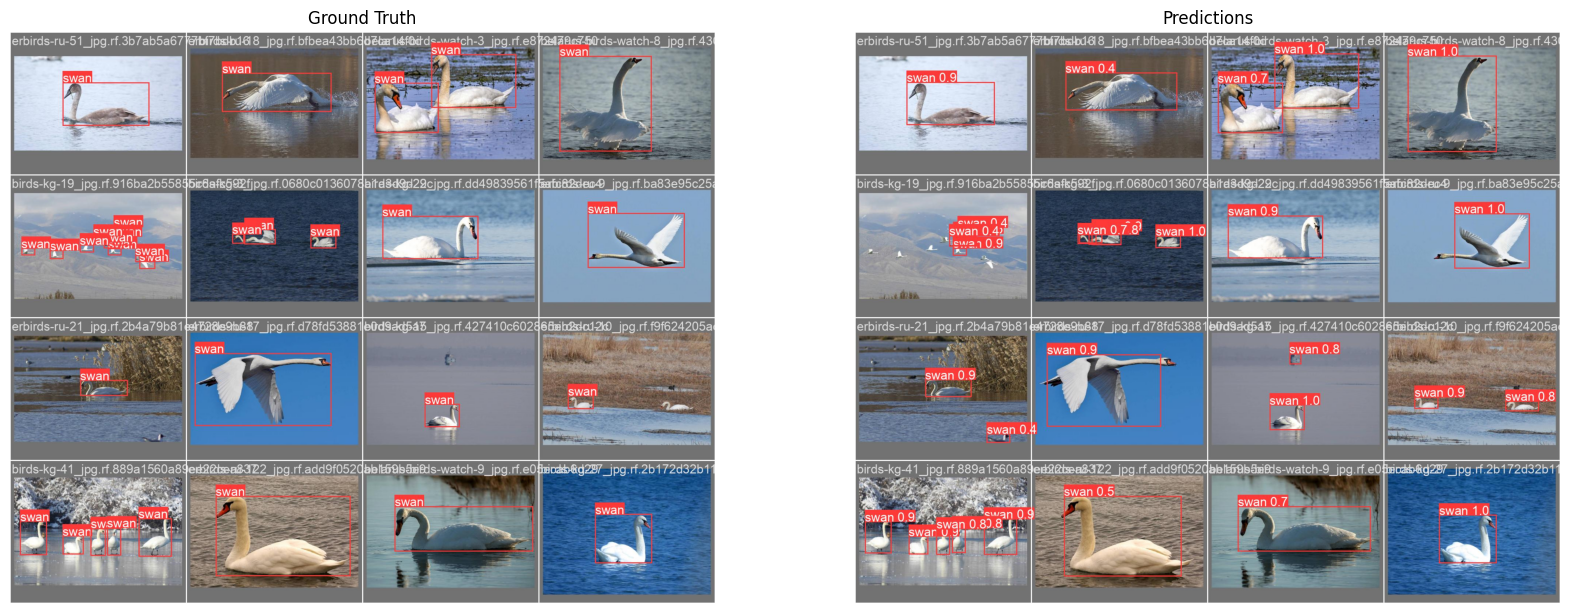

In [11]:
plt.figure(figsize=(20,10))

plt.subplot(1,2,1)
plt.title("Ground Truth")
plt.imshow(plt.imread(val_path+'/val_batch0_labels.jpg'))
plt.axis('off')

plt.subplot(1,2,2)
plt.title("Predictions")
plt.imshow(plt.imread(val_path+'/val_batch0_pred.jpg'))
plt.axis('off')

plt.show()

In [12]:
print('mAP on validation data: ', val_r.results_dict['metrics/mAP50(B)'])
print('Recall on validation data: ', val_r.results_dict['metrics/recall(B)'])
print('Precision on validation data: ', val_r.results_dict['metrics/precision(B)'])

mAP on validation data:  0.8487915596098077
Recall on validation data:  0.7894736842105263
Precision on validation data:  0.8279818680359803


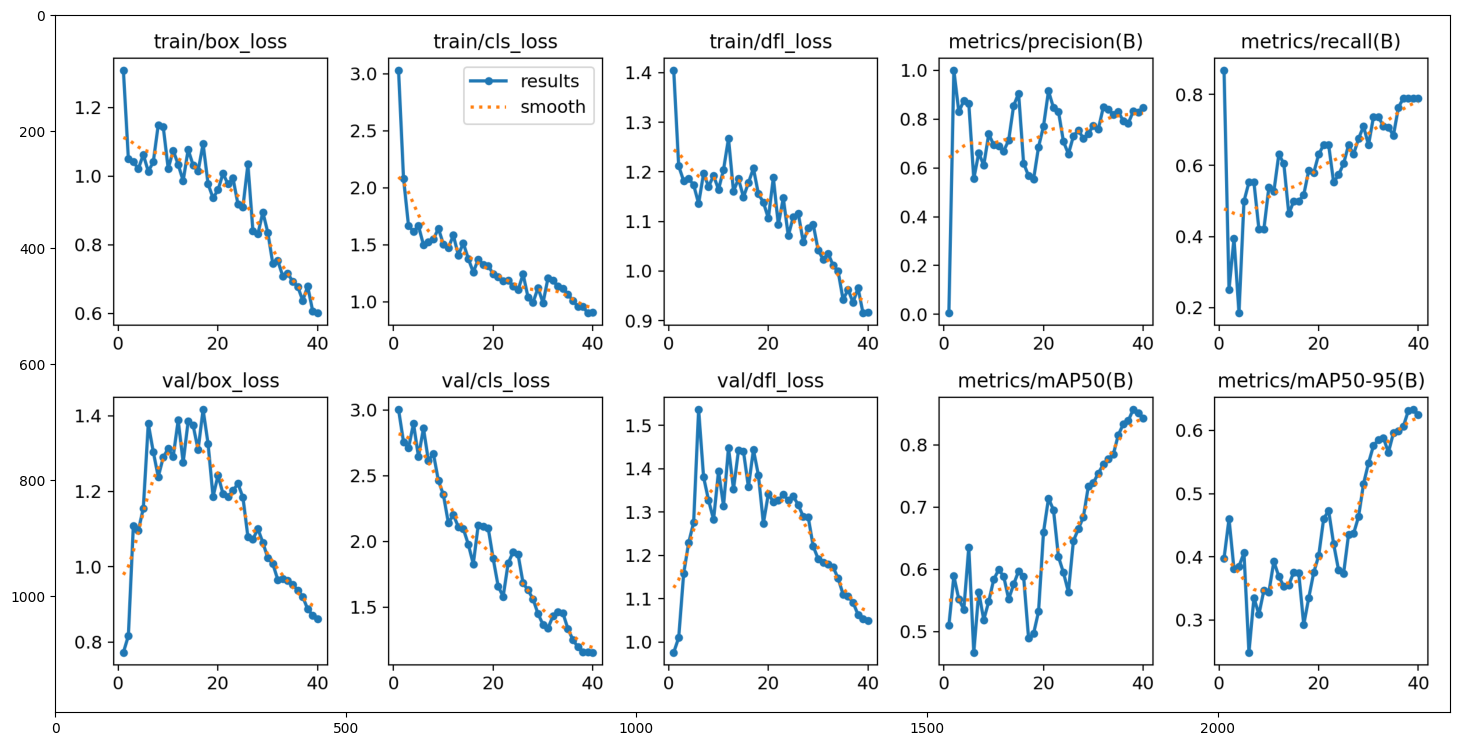

In [13]:
plt.figure(figsize=(18,10))
plt.imshow(plt.imread(train_path + '/results.png'))
plt.show()

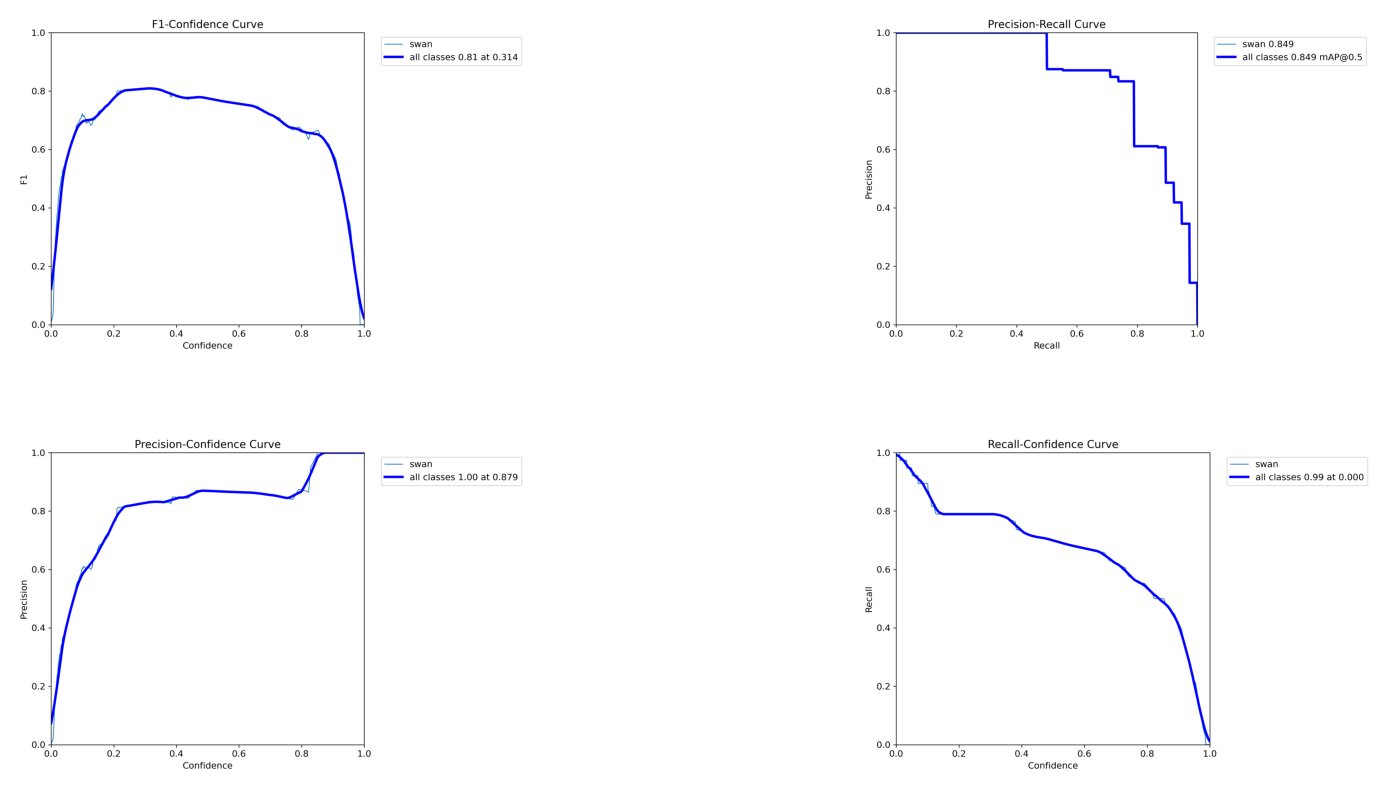

In [14]:
plt.figure(figsize=(20,10))
plt.subplot(2,2,1)
plt.imshow(plt.imread(val_path + '/F1_curve.png'))
plt.axis('off')

plt.subplot(2,2,2)
plt.imshow(plt.imread(val_path + '/PR_curve.png'))
plt.axis('off')

plt.subplot(2,2,3)
plt.imshow(plt.imread(val_path + '/P_curve.png'))
plt.axis('off')


plt.subplot(2,2,4)
plt.imshow(plt.imread(val_path + '/R_curve.png'))
plt.axis('off')


plt.show()

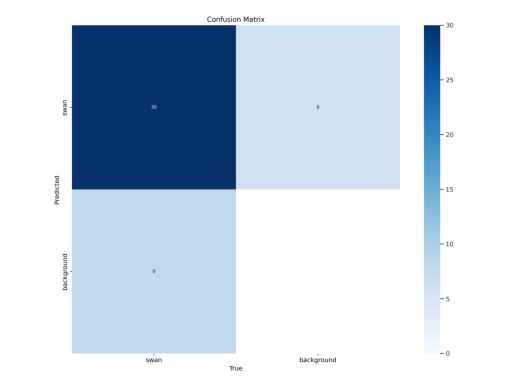

In [15]:
plt.imshow(plt.imread(val_path + '/confusion_matrix.png'))
plt.axis('off')
plt.show()

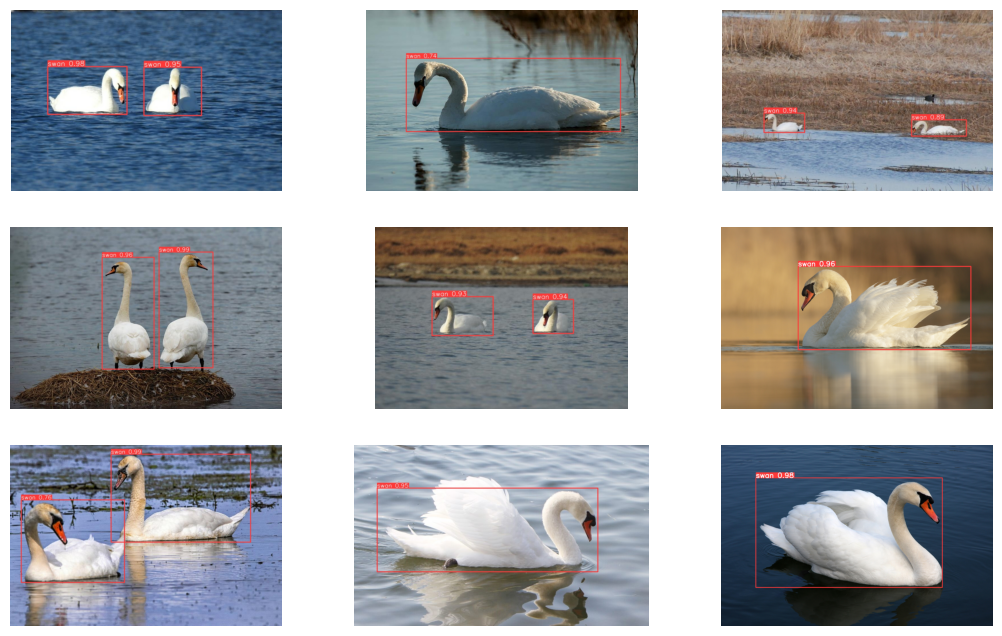

In [17]:
plt.figure(figsize=(13,8))
img_dir= preds[0].save_dir
all_files=os.listdir(img_dir)
data_path = [os.path.join(img_dir + "/" + i) for i in all_files]
sample = random.sample(data_path, 9)

for count,i in enumerate(sample):
    plt.subplot(int(len(sample)/3),int(len(sample)/3),count+1)
    plt.imshow(plt.imread(i))
    plt.axis('off')
plt.show()